<a href="https://colab.research.google.com/github/Umutoniwasepie/sustainable_tourism_summative_assignment/blob/main/Sustainable_tourism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sustainable Tourism Analysis Project

### Introduction

This notebook demonstrates the **Sustainable Tourism Analysis** pipeline, covering:
1. Data preprocessing and exploration.
2. Training and evaluating the machine learning model.
3. Predictions on test data.
4. Generating meaningful visualizations for feature analysis.
5. Demonstrating retraining and integration of new data into the pipeline.

The goal of this project is to assess the impact of tourism activities on the environment using CO2 emissions, energy consumption, and tourism activity as features. We utilize a **Logistic Regression** model to classify the environmental impact.


## Section 1: Data Exploration

### Objectives
- Explore the dataset to understand its structure and key features.
- Visualize distributions and correlations to identify patterns.
- Ensure data completeness and quality.

Dataset Overview:
   co2_emissions  energy_consumption  tourism_activity  impact
0      12.483571         3119.484349         36.496434       1
1       9.308678         2739.706946         47.109627       1
2      13.238443         2047.704296         34.151602       1
3      17.615149         1482.450578         43.840769       1
4       8.829233         2558.578651         12.127707       1

Summary Statistics:
       co2_emissions  energy_consumption  tourism_activity       impact
count    1000.000000         1000.000000       1000.000000  1000.000000
mean       10.132853         2066.130779         50.269214     0.530000
std         4.812218          775.608701         19.307351     0.499349
min         0.500000          500.000000         10.000000     0.000000
25%         6.762048         1515.006649         37.040008     0.000000
50%        10.126503         2050.461706         49.994985     1.000000
75%        13.239719         2583.105742         63.218306     1.000000
max    

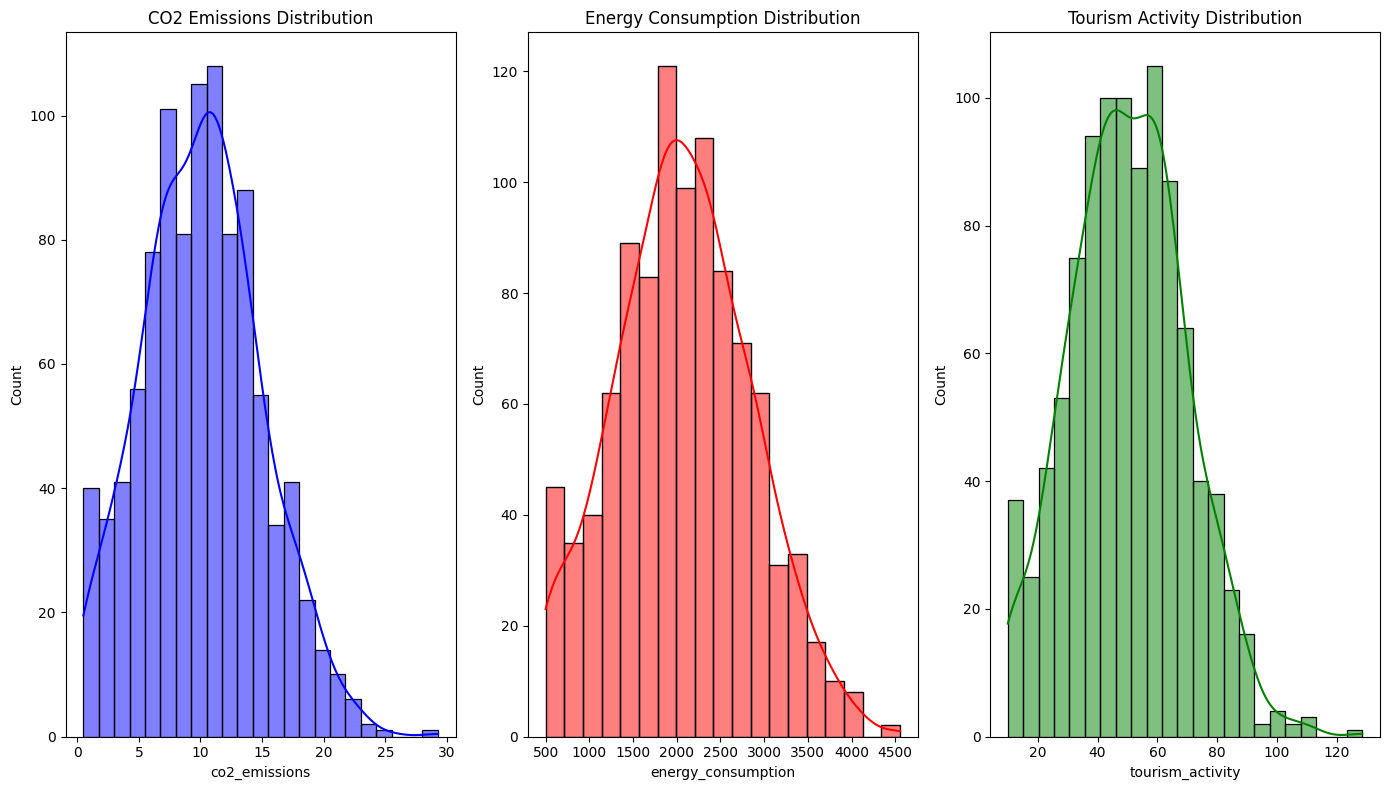

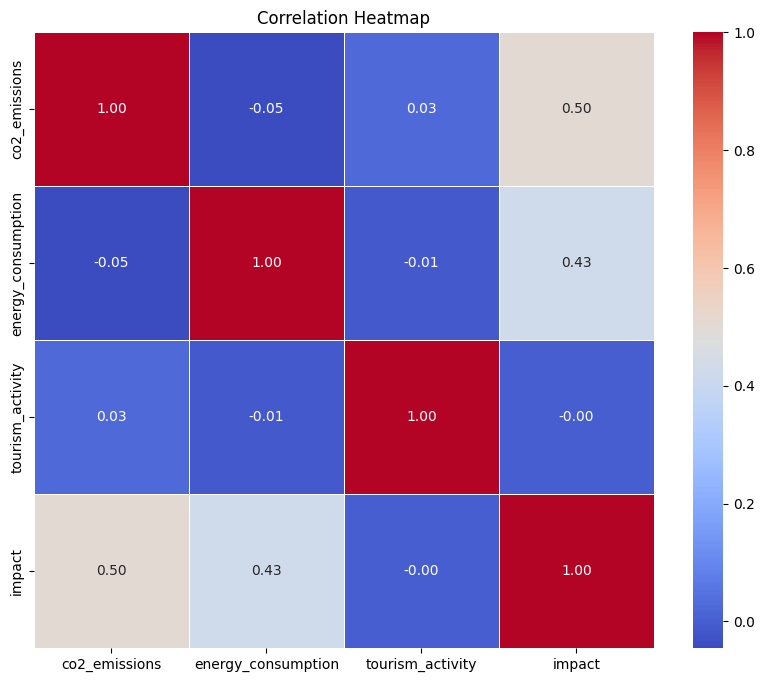

In [ ]:
# Data Exploration

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset path
dataset_path = "data/sustainable_tourism_dataset(1).csv"

# Load the dataset
data = pd.read_csv(dataset_path)

# Display dataset overview
print("Dataset Overview:")
print(data.head())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize distributions of features
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.histplot(data['co2_emissions'], kde=True, color='blue')
plt.title("CO2 Emissions Distribution")

plt.subplot(1, 3, 2)
sns.histplot(data['energy_consumption'], kde=True, color='red')
plt.title("Energy Consumption Distribution")

plt.subplot(1, 3, 3)
sns.histplot(data['tourism_activity'], kde=True, color='green')
plt.title("Tourism Activity Distribution")

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Dataset Insights
- The dataset contains 1,000 records and 4 columns:
  - `co2_emissions`: CO2 emissions levels of tourism activities.
  - `energy_consumption`: Energy consumption levels.
  - `tourism_activity`: The intensity of tourism activities.
  - `impact`: Target variable (1 for high impact, 0 for low impact).

### Key Observations:
1. There are no missing values in the dataset.
2. `co2_emissions` and `energy_consumption` have a moderate positive correlation with `impact`, indicating that these features influence environmental impact.
3. `tourism_activity` shows little to no correlation with `impact`.
4. The features exhibit varying distributions, with some skewness in `tourism_activity`.

### Visualizations:
- A **correlation heatmap** shows relationships between features.
- Feature distributions illustrate the spread of `co2_emissions`, `energy_consumption`, and `tourism_activity`.


## Section 2: Data Preprocessing

This section prepares the dataset for model training and evaluation. The key steps include:
1. **Feature Selection**: Selecting features (`co2_emissions`, `energy_consumption`, and `tourism_activity`) and the target (`impact`).
2. **Feature Normalization**: Using `StandardScaler` to normalize features for consistent scaling.
3. **Dataset Splitting**: Splitting the data into training and testing sets in an 80-20 ratio.
4. **Data Saving**: Saving the preprocessed data for reuse in the pipeline.
5. **Scaler Saving**: Storing the scaler for consistent transformations in later steps.



In [ ]:
# Data Preprocessing

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

# Paths for saving preprocessed data
train_path = "data/train/train_data.csv"
test_path = "data/test/test_data.csv"
scaler_path = "models/scaler.pkl"

# Features and target
X = data[['co2_emissions', 'energy_consumption', 'tourism_activity']]
y = data['impact']

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Save the scaler
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Save preprocessed datasets
train_data = pd.DataFrame(X_train, columns=['co2_emissions', 'energy_consumption', 'tourism_activity'])
train_data['impact'] = y_train.values
train_data.to_csv(train_path, index=False)

test_data = pd.DataFrame(X_test, columns=['co2_emissions', 'energy_consumption', 'tourism_activity'])
test_data['impact'] = y_test.values
test_data.to_csv(test_path, index=False)

# Display results
print("\nData Preprocessing Completed.")
print(f"Train data saved to: {train_path}")
print(f"Test data saved to: {test_path}")
print(f"Scaler saved to: {scaler_path}")



Data Preprocessing Completed.
Train data saved to: data/train/train_data.csv
Test data saved to: data/test/test_data.csv
Scaler saved to: models/scaler.pkl


### Preprocessing Output Summary:
1. **Train Data Saved To**: `data/train/train_data.csv`
2. **Test Data Saved To**: `data/test/test_data.csv`
3. **Scaler Saved To**: `models/scaler.pkl`

The preprocessed datasets are ready for training and evaluation, ensuring consistent scaling of features and proper dataset splits.


## Section 3: Model Training

### Objectives
- Train a Logistic Regression model to predict environmental impacts.
- Save the trained model for further use in predictions and retraining.
- Evaluate the model using appropriate metrics on the test dataset.


In [ ]:
# Model Training and Evaluation

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Paths for model and data
train_path = "data/train/train_data.csv"
test_path = "data/test/test_data.csv"
model_path = "models/tourism_model.pkl"

# Load training and testing data
train_data = pd.read_csv(train_path)
X_train = train_data[['co2_emissions', 'energy_consumption', 'tourism_activity']]
y_train = train_data['impact']

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
os.makedirs(os.path.dirname(model_path), exist_ok=True)
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model training complete. Model saved to: {model_path}")


Model training complete. Model saved to: models/tourism_model.pkl


## Section 4: Model Evaluation

### Objectives
- Evaluate the model using metrics like accuracy, precision, recall, and F1 score.
- Visualize the confusion matrix to understand prediction performance.



Model Evaluation Metrics:
Accuracy: 0.84
Precision: 0.85
Recall: 0.83
F1 Score: 0.84


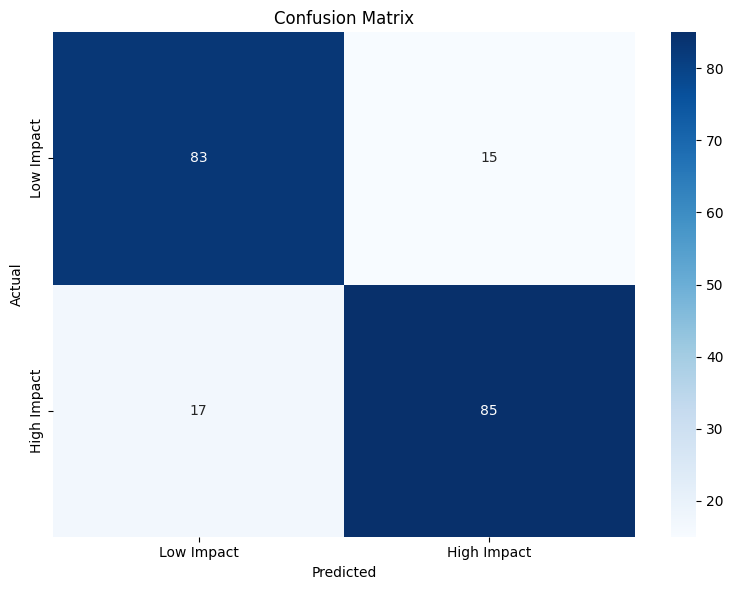

Confusion matrix saved to: models/confusion_matrix.png


In [ ]:
# Load testing data
test_data = pd.read_csv(test_path)
X_test = test_data[['co2_emissions', 'energy_consumption', 'tourism_activity']]
y_test = test_data['impact']

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low Impact", "High Impact"],
            yticklabels=["Low Impact", "High Impact"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Save the confusion matrix plot
conf_matrix_path = "models/confusion_matrix.png"
plt.savefig(conf_matrix_path)
plt.show()

print(f"Confusion matrix saved to: {conf_matrix_path}")


## Section 5: Summary of Model Training and Evaluation

### Outputs
1. Logistic Regression model trained using the training dataset.
2. Model evaluation metrics:
   - **Accuracy**: Proportion of correct predictions.
   - **Precision**: Proportion of true positive predictions among all positive predictions.
   - **Recall**: Proportion of true positive predictions among all actual positives.
   - **F1 Score**: Harmonic mean of precision and recall.
3. Confusion matrix:
   - Visualized and saved for insights into model predictions.
4. Saved model (`tourism_model.pkl`) for use in prediction and retraining processes.


## Section 6: Prediction Pipeline

### Objectives
- Demonstrate the use of the trained model for predictions.
- Create a pipeline for:
  - Single-point predictions.
  - Batch predictions on multiple data points.
- Save the results for analysis and review.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import pickle

# Paths for the model and scaler
model_path = "models/tourism_model.pkl"
scaler_path = "models/scaler.pkl"

# Load the trained model
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Load the scaler
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

# Define a single data point for prediction
features = [35, 21, 1.8]  # Example input: [CO2 emissions, energy consumption, tourism activity]

# Normalize the features
feature_names = ['co2_emissions', 'energy_consumption', 'tourism_activity']
features_df = pd.DataFrame([features], columns=feature_names)
features_normalized = scaler.transform(features_df)

# Predict the class and probability
prediction = model.predict(features_normalized)
probability = model.predict_proba(features_normalized)

print("\nSingle Prediction Result:")
print(f"Impact: {prediction[0]} (0 = Low, 1 = High)")
print(f"Probability: {probability[0]}")



Single Prediction Result:
Impact: 0 (0 = Low, 1 = High)
Probability: [9.99610245e-01 3.89754522e-04]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Paths for input and output CSVs
input_csv = "data/test/test_data.csv"
output_csv = "data/test/test_predictions.csv"

# Load the batch data
batch_data = pd.read_csv(input_csv)

# Normalize the features
features = batch_data[['co2_emissions', 'energy_consumption', 'tourism_activity']]
features_normalized = scaler.transform(features)

# Predict the classes and probabilities
predictions = model.predict(features_normalized)
probabilities = model.predict_proba(features_normalized)

# Save the predictions to the dataset
batch_data['impact_prediction'] = predictions
batch_data['probability_high'] = probabilities[:, 1]

# Save the predictions to a new CSV file
batch_data.to_csv(output_csv, index=False)

print("\nBatch Prediction Results:")
print(f"Predictions saved to: {output_csv}")
print(batch_data[['impact_prediction', 'probability_high']].head())



Batch Prediction Results:
Predictions saved to: data/test/test_predictions.csv
   impact_prediction  probability_high
0                  0          0.000100
1                  0          0.000123
2                  0          0.000032
3                  0          0.000059
4                  0          0.000045


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Section 7: Summary of Prediction Pipeline

### Outputs
1. **Single Prediction**:
   - Input: A single data point (e.g., `[35, 21, 1.8]`).
   - Output:
     - Predicted class: Low (0) or High (1) environmental impact.
     - Prediction probability.

2. **Batch Prediction**:
   - Input: A CSV file containing multiple data points.
   - Output:
     - Predicted classes and probabilities added as new columns in the dataset.
     - Results saved to a new CSV file.

3. **Pipeline Readiness**:
   - The model can now handle both single-point and batch predictions, making it suitable for deployment.


## Section 8: Integration with FastAPI and Retraining Process

### Objectives
- Demonstrate the integration of the prediction pipeline into a FastAPI application.
- Highlight how new data can be uploaded and used to retrain the model.
- Show the retraining process, including evaluation of the updated model.


In [ ]:
# Import required libraries
from fastapi import FastAPI, UploadFile, File, HTTPException
import pandas as pd
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize FastAPI
app = FastAPI()

# File paths
MODEL_PATH = "models/tourism_model.pkl"
SCALER_PATH = "models/scaler.pkl"
TRAIN_PATH = "data/train/train_data.csv"

# Load model and scaler
def load_model(model_path):
    with open(model_path, 'rb') as file:
        return pickle.load(file)

def load_scaler(scaler_path):
    with open(scaler_path, 'rb') as file:
        return pickle.load(file)

model = load_model(MODEL_PATH)
scaler = load_scaler(SCALER_PATH)

@app.post("/retrain_model/")
async def retrain_model(file: UploadFile = File(...)):
    """
    Retrain the model with new data uploaded via API.

    Args:
        file: CSV file containing new training data.
    """
    try:
        # Save the uploaded file temporarily
        file_location = f"data/uploads/{file.filename}"
        os.makedirs(os.path.dirname(file_location), exist_ok=True)
        with open(file_location, "wb") as f:
            f.write(await file.read())

        # Load the new data
        new_data = pd.read_csv(file_location)

        # Check required columns
        required_columns = ["co2_emissions", "energy_consumption", "tourism_activity", "impact"]
        if not all(col in new_data.columns for col in required_columns):
            raise HTTPException(
                status_code=400, detail=f"Dataset must contain columns: {required_columns}"
            )

        # Handle missing values
        if new_data.isnull().any().any():  # Check for NaN values
            from sklearn.impute import SimpleImputer
            imputer = SimpleImputer(strategy="mean")  # Impute with mean
            new_data.iloc[:, :] = imputer.fit_transform(new_data)

        # Combine new data with existing training data
        train_data = pd.read_csv(TRAIN_PATH)
        combined_data = pd.concat([train_data, new_data], ignore_index=True)

        # Split features and target
        X = combined_data[['co2_emissions', 'energy_consumption', 'tourism_activity']]
        y = combined_data['impact']

        # Normalize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Train the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Save the updated model and scaler
        with open(MODEL_PATH, 'wb') as model_file:
            pickle.dump(model, model_file)
        with open(SCALER_PATH, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        # Update the training dataset
        combined_data.to_csv(TRAIN_PATH, index=False)

        return {
            "message": "Model retrained successfully.",
            "evaluation": {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1_score": f1
            }
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


## Section 9: Explanation of Retraining Process

### Workflow
1. **Data Upload**:
   - The user uploads a CSV file containing new training data.
   - The API validates that the uploaded file contains the required columns.

2. **Data Integration**:
   - The new data is combined with the existing training dataset.

3. **Preprocessing**:
   - Features are normalized using `StandardScaler`.
   - Data is split into training and testing sets.

4. **Model Training**:
   - A logistic regression model is trained on the updated dataset.

5. **Evaluation**:
   - The model is evaluated using metrics such as accuracy, precision, recall, and F1 score.

6. **Model and Scaler Update**:
   - The updated model and scaler are saved to the respective paths.
   - The combined training dataset is saved for future retraining.

---

### **Output of the Retraining Process**
- Message indicating successful retraining.
- Updated evaluation metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
